## Geospatial Data Sciecne Workshop
### Professor Song Gao, Department of Geography @UW-Madison
### Faculty Affiliate of Data Science Institute @UW-Madison
### Email: song.gao@wisc.edu

## (1) Vector Data Processing

In [2]:
import pandas as pd
import geopandas as gpd
import json

# Load geojson or shapefile of COVID-19 data at the census tract level
# https://data.dhsgis.wi.gov/datasets/wi-dhs::covid-19-data-by-census-tract-v2/about

with open('./data/COVID-19_Data_by_Census_Tract_V2/COVID-19_Data_by_Census_Tract_V2.geojson', 'r') as covid_file:
    covid_geojson = json.load(covid_file)
    
# Extract positive information of each census tract
covid_data = []
for feature in covid_geojson["features"]:
    geoid = feature["properties"]["GEOID"]
    date = feature["properties"]["Date"]
    positive = feature["properties"]["POS_CUM_CP"]
    covid_data.append([geoid, date, positive])
print(covid_data[0])

['55079019100', '2023-08-14T06:00:00Z', 1458]


In [3]:
# Construct the DataFrame of COVID-19 data
covid_data = pd.DataFrame(covid_data, columns=["ct", "date", "positive"])
covid_data.head()

,ct,date,positive
0,55079019100,2023-08-14T06:00:00Z,1458
1,55079019200,2023-08-14T06:00:00Z,1265
2,55079019300,2023-08-14T06:00:00Z,1104
3,55079020200,2023-08-14T06:00:00Z,1430
4,55079020300,2023-08-14T06:00:00Z,1820


In [4]:
# Assign GEOID at multiple levels
covid_data["county"] = covid_data["ct"].apply(lambda x: str(x)[0:5])
covid_data

,ct,date,positive,county
0,55079019100,2023-08-14T06:00:00Z,1458,55079
1,55079019200,2023-08-14T06:00:00Z,1265,55079
2,55079019300,2023-08-14T06:00:00Z,1104,55079
3,55079020200,2023-08-14T06:00:00Z,1430,55079
4,55079020300,2023-08-14T06:00:00Z,1820,55079
...,...,...,...,...
1388,55023960500,2023-08-14T06:00:00Z,582,55023
1389,55023960600,2023-08-14T06:00:00Z,1823,55023
1390,55025000100,2023-08-14T06:00:00Z,677,55025
1391,55025000201,2023-08-14T06:00:00Z,512,55025


,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_NO_CP,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,ShapeSTArea,ShapeSTLength,geometry
0,2023-08-15 19:00:00+00:00,55079019100,NaN,1458,0,0.00,12,0,0.0,0,...,741,622,2023-08-14 06:00:00+00:00,3923,353.0,446,Census tract,2.925727e+06,12042.061097,"POLYGON ((-87.95827 42.97785, -87.95827 42.977..."
1,2023-08-15 19:00:00+00:00,55079019200,NaN,1265,1,0.43,8,0,0.0,0,...,637,576,2023-08-14 06:00:00+00:00,3408,267.0,447,Census tract,2.662727e+06,8232.098589,"POLYGON ((-87.97765 42.99929, -87.97875 42.999..."
2,2023-08-15 19:00:00+00:00,55079019300,NaN,1104,0,0.00,5,0,0.0,0,...,555,506,2023-08-14 06:00:00+00:00,3213,464.0,448,Census tract,1.651494e+06,5442.414725,"POLYGON ((-87.98759 42.99748, -87.98759 42.997..."
3,2023-08-15 19:00:00+00:00,55079020200,NaN,1430,0,0.14,3,0,0.0,0,...,732,658,2023-08-14 06:00:00+00:00,3626,319.0,449,Census tract,1.775321e+06,5415.330401,"POLYGON ((-87.93392 42.98110, -87.93415 42.981..."
4,2023-08-15 19:00:00+00:00,55079020300,NaN,1820,0,0.14,9,0,0.0,0,...,942,821,2023-08-14 06:00:00+00:00,4028,306.0,450,Census tract,2.712178e+06,6590.530590,"POLYGON ((-87.92645 42.98470, -87.92669 42.984..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,2023-08-15 19:00:00+00:00,55023960500,NaN,582,0,0.00,0,0,0.0,0,...,310,253,2023-08-14 06:00:00+00:00,2057,145.0,3688,Census tract,4.496619e+06,12906.142005,"POLYGON ((-91.13825 43.05209, -91.13961 43.052..."
1389,2023-08-15 19:00:00+00:00,55023960600,NaN,1823,0,0.00,15,0,0.0,0,...,618,1146,2023-08-14 06:00:00+00:00,3628,183.0,3689,Census tract,5.464529e+07,45315.288945,"POLYGON ((-91.13124 42.99952, -91.13126 43.000..."
1390,2023-08-15 19:00:00+00:00,55025000100,NaN,677,0,0.29,1,0,0.0,0,...,303,356,2023-08-14 06:00:00+00:00,2437,306.0,3690,Census tract,3.873392e+06,11250.550418,"POLYGON ((-89.48240 43.09452, -89.48322 43.094..."
1391,2023-08-15 19:00:00+00:00,55025000201,NaN,512,0,0.00,4,0,0.0,0,...,240,260,2023-08-14 06:00:00+00:00,2059,127.0,3691,Census tract,3.502693e+06,8135.082414,"POLYGON ((-89.47186 43.07440, -89.47251 43.074..."


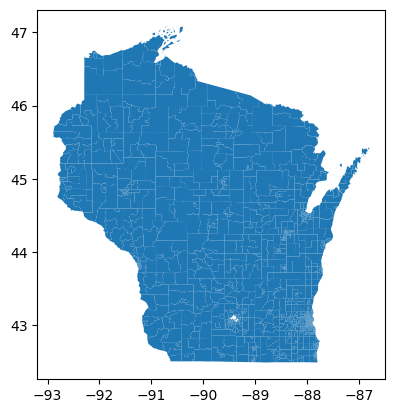

In [6]:
## Read a GeoJSON File into a GeoPandas DataFrame
import geopandas as gpd
gdf = gpd.read_file('./data/COVID-19_Data_by_Census_Tract_V2/COVID-19_Data_by_Census_Tract_V2.geojson')
gdf.plot()
gdf

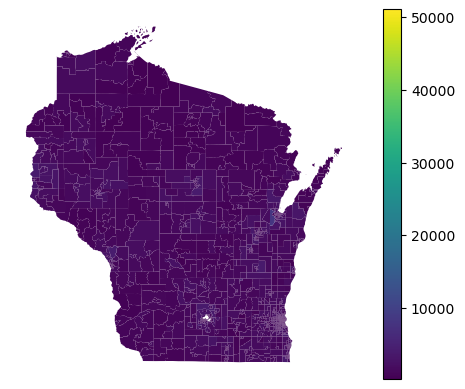

In [11]:
## Create a choropleth map using the cumulative positive cases or another target variable
# https://geopandas.org/en/stable/docs/user_guide/mapping.html

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

map = gdf.plot(column='POS_CUM_CP', ax=ax, legend=True)
map.set_axis_off()


,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,ShapeSTArea,ShapeSTLength,geometry,county
104,2023-08-15 19:00:00+00:00,55025001403,NaN,2968,0,0.29,13,0,0.0,0,...,1735,2023-08-14 06:00:00+00:00,8784,621.0,550,Census tract,2.092508e+07,25088.008947,"POLYGON ((-89.38301 43.02580, -89.38308 43.026...",55025
105,2023-08-15 19:00:00+00:00,55025001501,NaN,787,0,0.00,2,0,0.0,0,...,429,2023-08-14 06:00:00+00:00,1781,170.0,551,Census tract,2.064935e+06,9804.568037,"POLYGON ((-89.33611 43.04708, -89.33613 43.047...",55025
106,2023-08-15 19:00:00+00:00,55025001502,NaN,2467,1,0.29,5,0,0.0,0,...,1356,2023-08-14 06:00:00+00:00,4649,696.0,552,Census tract,2.022733e+07,28638.142402,"POLYGON ((-89.33611 43.04708, -89.33616 43.047...",55025
107,2023-08-15 19:00:00+00:00,55025001603,NaN,2188,0,0.00,0,0,0.0,0,...,876,2023-08-14 06:00:00+00:00,4628,536.0,553,Census tract,3.295121e+05,2987.846653,"POLYGON ((-89.38993 43.07477, -89.39093 43.074...",55025
108,2023-08-15 19:00:00+00:00,55025001604,NaN,2857,0,0.00,1,0,0.0,0,...,1232,2023-08-14 06:00:00+00:00,6268,823.0,554,Census tract,5.140703e+05,3011.401304,"POLYGON ((-89.38699 43.07687, -89.38785 43.077...",55025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,2023-08-15 19:00:00+00:00,55025001401,NaN,2315,1,0.14,12,0,0.0,0,...,1285,2023-08-14 06:00:00+00:00,6969,563.0,3166,Census tract,7.823604e+06,13241.041764,"POLYGON ((-89.37100 43.04724, -89.37095 43.047...",55025
1053,2023-08-15 19:00:00+00:00,55025001402,NaN,1909,1,0.14,4,0,0.0,0,...,1068,2023-08-14 06:00:00+00:00,5535,412.0,3167,Census tract,1.817676e+07,20448.416426,"POLYGON ((-89.41708 43.05918, -89.41722 43.059...",55025
1390,2023-08-15 19:00:00+00:00,55025000100,NaN,677,0,0.29,1,0,0.0,0,...,356,2023-08-14 06:00:00+00:00,2437,306.0,3690,Census tract,3.873392e+06,11250.550418,"POLYGON ((-89.48240 43.09452, -89.48322 43.094...",55025
1391,2023-08-15 19:00:00+00:00,55025000201,NaN,512,0,0.00,4,0,0.0,0,...,260,2023-08-14 06:00:00+00:00,2059,127.0,3691,Census tract,3.502693e+06,8135.082414,"POLYGON ((-89.47186 43.07440, -89.47251 43.074...",55025


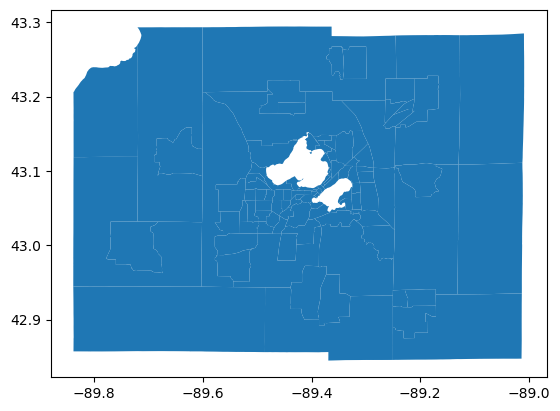

In [12]:
## Spatially zoom into the Dane County
# Assign GEOID at multiple levels
gdf["county"] = gdf["GEOID"].apply(lambda x: str(x)[0:5])
dane=gdf[gdf["county"]=='55025']
dane.plot()
dane

<Axes: >

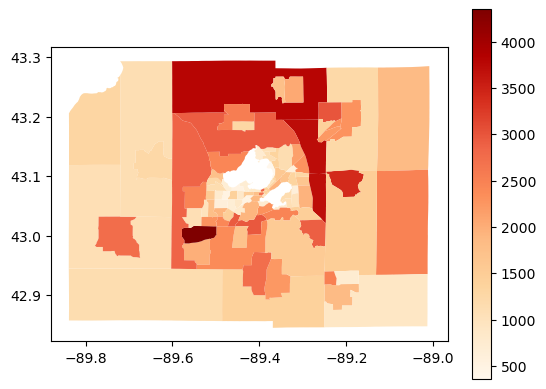

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

dane.plot(column='POS_CUM_CP', ax=ax, cmap='OrRd', legend=True)


### Multiscale Dynamic Human Mobility Flow Dataset in the U.S. during the COVID-19 Pandemic

Monitoring dynamic human mobility changes and travel flow patterns at different geographic scales is crucial for understanding human behavior changes during the COVID-19 pandemic. The open data created by the GeoDS Lab at UW-Madison are available at the census tract, county, and state levels. Please download one week of "weekly flow data" at the census tract level for Dane County, WI and convert them to ZCTA-to-ZCTA flow data matrix. 
## https://github.com/GeoDS/COVID19USFlows

In [13]:
%pip install wget ## a package to source data from websites

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '##'


In [ ]:
## Download Data Files and store into a folder "mobilityflows"
import wget
data_folder="./mobilityflows"
for i in range(20):
    url = "https://raw.githubusercontent.com/GeoDS/COVID19USFlows-WeeklyFlows-Ct2021/master/weekly_flows/ct2ct/2021_01_04/weekly_ct2ct_2021_01_04_"+str(i)+".csv"
    wget.download(url, out='./mobilityflows')


In [ ]:
# Merge all files
import os
import pandas as pd
data_folder="./mobilityflows"
flow_all = []
for file in os.listdir(data_folder):
    if file[-3:] == "csv" and 'weekly_ct2ct' in file:
        print(data_folder+"/"+file)
        flow_df = pd.read_csv(data_folder+"/"+file)
        flow_all.append(flow_df)
result = pd.concat([x for x in flow_all])
result.to_csv("weekly_ct2ct_2021_01_04.csv", index=False)
print(result.shape)
result.head()

In [ ]:
print(result.shape)
print(result.dtypes)

In [ ]:
## filter out the data in Dane County (or another county) starting with GeoID 55025
result[[ 'geoid_o', 'geoid_d']] = result[['geoid_o','geoid_d']].astype(str) # Multiple columns string conversion
print(result.dtypes)
dane_county_flows_ct = result[result['geoid_o'].str.startswith('55025') & result['geoid_d'].str.startswith('55025')]
dane_county_flows_ct

## (2) Raster Data Analysis and Google Earth Engine

In [ ]:
!pip install geemap

In [ ]:
!pip install -U google-api-python-client==1.12.8
## https://github.com/giswqs/geemap/discussions/243!

###  Create your own personal Google Earth Engigne Account (free for academic and research use.)
https://code.earthengine.google.com/register

### Add the Dynymic World 10m near-real-time (NRT) Land Use/Land Cover (LULC) dataset that includes class label information for nine LULC classes: Water, Trees, Grass, Flooded vegetation, Crops, Shrub and Scrub, Built-up, Bare, Snow and ice from yr 2015-Present:

https://www.nature.com/articles/s41597-022-01307-4

In [ ]:
import ee
import geemap

ee.Authenticate()

Map = geemap.Map()
Map.add_basemap('HYBRID')
Map

In [ ]:
# Set the region of interest by simply drawing a polygon on the map
region = Map.user_roi
if region is None:
    region = ee.Geometry.BBox(-89.7088, 42.9006, -89.0647, 43.2167) ## You can also set a Polygon: ee.Geometry.Polygon()
Map.centerObject(region)

In [ ]:
# Set the date range to query the data
start_date = '2016-01-01'
end_date = '2016-12-31'

In [ ]:
# Create Dynamic World land cover composite
# The "return_type" can be hillshade, visualize, class, or probability. 
# If you want to use the resulting images for further analysis, you should use class.

landcover = geemap.dynamic_world(region, start_date, end_date, return_type='hillshade')
Map.addLayer(landcover, {}, 'Land Cover')
# Add legend to the map
Map.add_legend(title="Dynamic World Land Cover", builtin_legend='Dynamic_World')
Map.centerObject(region)
Map

In [ ]:
## Return "class" images for further zonal summary analysis 
classes = geemap.dynamic_world(region, start_date, end_date, return_type='class')
df = geemap.image_area_by_group(classes, region=region, scale=10, denominator=1e6)
df

## Create Landsat satellite image timeseries
https://geemap.org/geemap/#geemap.geemap.Map.add_landsat_ts_gif


In [ ]:
!pip install ffmpeg-python

In [ ]:
import os
out_dir = os.path.join(os.path.expanduser("~"), 'Downloads')
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

Map = geemap.Map()
label = 'Land Cover/Use Changes in Doha, Qatar'

# Set the region of interest by simply drawing a polygon on the map
region = Map.user_roi
if region is None:
    region = ee.Geometry.BBox(51.23621, 25.24974, 51.71862, 25.48035) # set your own region bounding box
# ee.Geometry.BBox(-89.7088, 42.9006, -89.0647, 43.2167) # Madison bounding box

Map.centerObject(region)

Map.add_landsat_ts_gif(
    label=label,
    roi=region,
    start_year=1985,
    bands=['Red', 'Green', 'Blue'],
    font_color='white',
    frames_per_second=5,
    progress_bar_color='blue',
    out_gif=out_dir+'/landsat_ts.gif',
)

## (3) Street Network Analysis Using OSMnx
- [GitHub repo](https://github.com/gboeing/osmnx)

In [ ]:
import matplotlib.cm as cm
import networkx as nx
import numpy as np
import osmnx as ox
import pandas as pd
%matplotlib inline

# get the network for downloading
G = ox.graph_from_place('Madison, WI, USA', network_type='drive', simplify=True)
fig, ax = ox.plot_graph(G, figsize=(8,8), node_size=1, node_alpha=0.5,
                        edge_linewidth=0.2, save=True, dpi=200,filepath='./madison.jpg')

In [ ]:
## Compute network stats
G = nx.MultiDiGraph(G) # convert a MultiGraph to simple Graph
print(G)
betweennessCentrality = nx.edge_betweenness_centrality(G,normalized=True) # (start_node, end_node) : betw_value
print(nx.number_of_nodes(G))
print(nx.number_of_edges(G))
print(len(betweennessCentrality))

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors

Betweenness = [betweennessCentrality[edge] for edge in G.edges()]
print('len(Betweenness)',len(Betweenness))
print(min(Betweenness), max(Betweenness))

#nx.set_edge_attributes(G, betweennessCentrality, "edge_bc")

Betweenness_list = [i if i != 0 else 1 for i in Betweenness] # for visualization use only (0,1)
print('len(Betweenness_list)',len(Betweenness_list))
print(min(Betweenness_list), max(Betweenness_list))

#color scale converted to list of colors for graph edges
#norm = colors.Normalize(vmin=min(Betweenness), vmax=max(Betweenness))
#norm = colors.PowerNorm(gamma=2,vmin=min(Betweenness), vmax=max(Betweenness))
norm = colors.LogNorm(vmin=min(Betweenness_list), vmax=max(Betweenness_list))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.plasma)
color_scale = [cmap.to_rgba(cl) for cl in Betweenness]
print('len(color_scale)',len(color_scale))
## osmnx ploting requires the MultiGraph type
ox.plot_graph(G, bgcolor='k',node_size=0, edge_linewidth=0.2, edge_color=color_scale,edge_alpha=1)